## ML introduction
### The one-neuron network

In [45]:
import numpy as np


### Dataset creation
First we create the dataset. Each point of the dataset is made of two numbers, the input *x*, and the *label*. Ultimately, we want our neuron to be able to predict the label for any value of x. Here, we create the function that compute a realisation of the label for a given input x. The underlying structure of the dataset is a linear function with gaussian noise.

In [46]:
#dataset coefficients
au,bu=1,0

#dataset generation

def data_gen(x,au,bu,sig):
    return au*x+bu+np.random.normal(0,sig,x.size)


We create two datasets, the training set of size *training_set_size*, and the validation set of size *val_set_size*, for x taking random values in [-0.1,0.1].

In [47]:
#dataset parameters
training_set_size=150
val_set_size=50

x_train=np.random.random(training_set_size)*2-1
x_val=np.random.random(val_set_size)*2-1

labels_train=data_gen(x_train,au,bu,.1)
labels_val=data_gen(x_val,au,bu,.1)

We then visualise the training (blue) and validation (orange) datasets.

Text(0.5, 0, 'x')

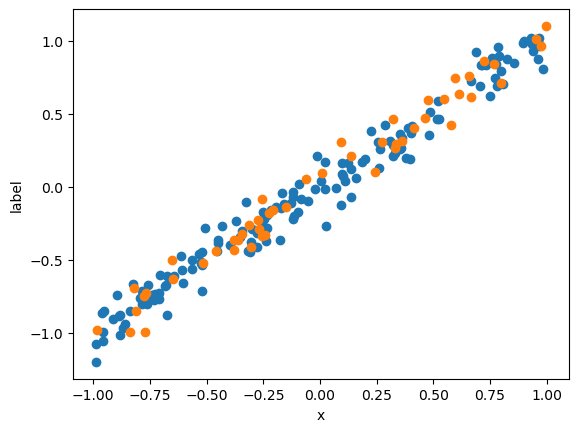

In [48]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_train,labels_train)
plt.scatter(x_val,labels_val)
plt.ylabel('label')
plt.xlabel('x')

### Neuron

We define our neuron activation, which compute $y$, the *state* of the neuron. In this case, $y$ is also the model output, and the neuron activation function is the full **foward propagation** of the model: $y(x)$ where *x* is the model's input, and $y$ is the model's output, hence its prediction. 


In [49]:

def transfert(x,W): #y
    return np.dot(np.array([x,1]),W)

### Cost function
We define the cost function as the distance squared between the model's prediction $y$, and the actual *label* of the training set. The cost is zero when the predicted value $y$ is exactly the label

In [50]:
#cost function
def cost(y,label):
    return (y-label)**2

### Backward propagation

The backward propagation is the computation of the partial derivative of the cost function with respect to the output of each neuron. Here we simply need $\partial C / \partial y$.

In [51]:
def dcostdy(y,label):
    return 2*(y-label)

### Weight update
Finaly, we compute the effect of the variation of each weight on the cost function: $\frac{\partial C}{\partial w_k} = \frac{\partial y }{ \partial w_k}   \frac{\partial C }{ \partial y}$

In [52]:
def dcostdweight(x,y,label):
    return np.array([x,1])*dcostdy(y,label)

We can now start the training. Let's log everything for the first loop. We start with the weigths at w0,w1=0.3,0.3

In [53]:
#First forward propagation

weights=np.array([.3,.3])

y_train=transfert(x_train[0],weights)

print('input',x_train[0])
print('weights',weights)
print('neuron activation',y_train)#y(x)
print('labels',labels_train[0])
print('cost',cost(y_train,labels_train[0]))

#backward propagation
print('dcostdy',dcostdy(y_train,labels_train[0]))
print('dcostdweight',dcostdweight(x_train[0],y_train,labels_train[0]))

input 0.7592161666147568
weights [0.3 0.3]
neuron activation 0.527764849984427
labels 0.8845786921625678
cost 0.1273161179699272
dcostdy -0.7136276843562817
dcostdweight [-0.54179767 -0.71362768]


dcostdweight is giving us the direction in which the cost increases. We want to update the weights in the oposite direction. We do not know *a priori* by how much the weights should be updated, as we only computed the local slope. We define an arbitrary learning rate $\lambda$ and update the weights: $w_{k,new}=w_{k,old} - \lambda \frac{\partial C}{\partial w_{k,old}}$   

In [54]:
#Weights update

learning_rate=.03
weights=weights-learning_rate*dcostdweight(x_train[0],y_train,labels_train[0])
y_train=transfert(x_train[0],weights)
print('new weights',weights)
print('new cost',cost(y_train,labels_train[0]))

new weights [0.31625393 0.32140883]
new cost 0.10437084240565869


For this particular element of the training set, the cost is slightly reduced. 

### Online learning for a single epoch

we will go through the training set once (one epoch), updating the weights at each evalutation of the training set (online learning). We loop through the neuron activation, back propagation and weight update and save the cost, and the value of the weights, for display.

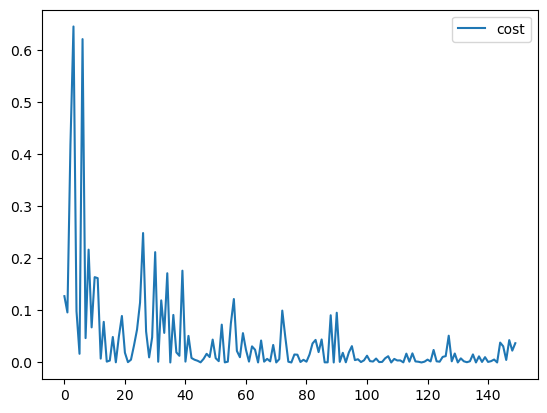

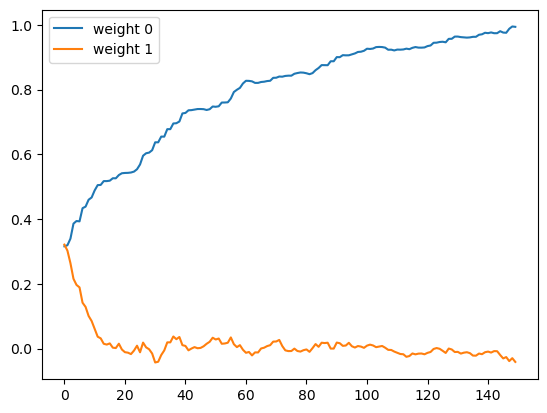

In [55]:
#training for a single epoch 

weights=np.array([.3,.3])
learning_rate=.03

Tcost,Tw0,Tw1=[],[],[]

for k in range(training_set_size):
    
    y_train=transfert(x_train[k],weights)
    Tcost.append(cost(y_train,labels_train[k]))
    weights=weights-learning_rate*dcostdweight(x_train[k],y_train,labels_train[k])
    Tw0.append(weights[0])
    Tw1.append(weights[1])
    
    
plt.figure()
plt.plot(Tcost,label='cost')
plt.legend()

plt.figure()
plt.plot(Tw0,label='weight 0')
plt.plot(Tw1,label='weight 1')
plt.legend()

Depending on the size of the training set, the cost should have a tedency to decrease, and the weights get closer to the values we used to generate the training set. 

### Multi-epoch training

We can just put the previous code into an additional loop that will go through the training set multiple times, try diferent number of epoch to see when the training converge.

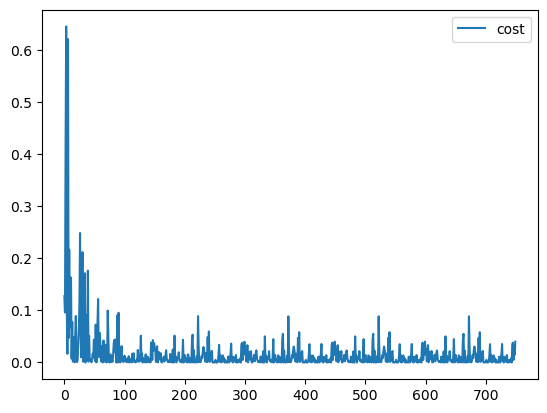

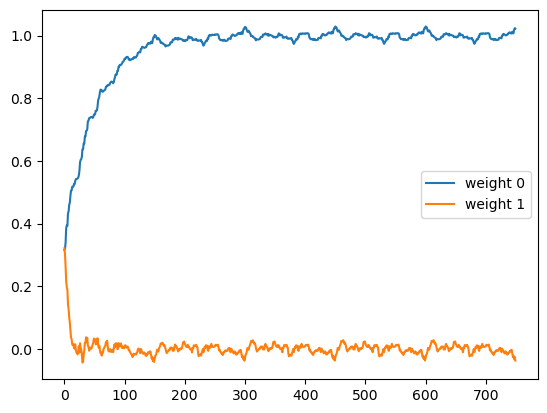

In [56]:
#online learning

weights=np.array([.3,.3])
Tcost,Tw0,Tw1=[],[],[]
nb_epoch=5
learning_rate=.03

for j in range(nb_epoch):
    for k in range(training_set_size):

        y=transfert(x_train[k],weights)
        Tcost.append(cost(y,labels_train[k]))
        weights-=learning_rate*dcostdweight(x_train[k],y,labels_train[k])
        Tw0.append(weights[0])
        Tw1.append(weights[1])


plt.figure()
plt.plot(Tcost,label='cost')
plt.legend()

plt.figure()
plt.plot(Tw0,label='weight 0')
plt.plot(Tw1,label='weight 1')
plt.legend()

The exercise is now complete.

## Bonus - batch learning

You can modify the network so that it computes $Dw = \partial C / \partial w$ over several elements of the training set, then average the $Dw$ before updating the weights. this is called batch learning

In [57]:
def transfert_batch(x,weights):
    return np.dot(weights,np.array([x,np.ones(x.size)]))

def dcostdweight_batch(x,y,label):
    return np.array([x,np.ones(x.size)])*dcostdy(y,label)

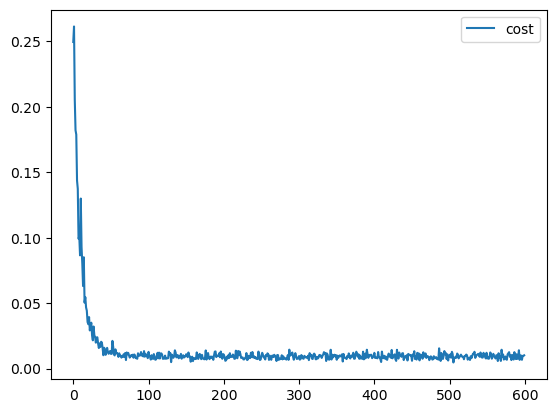

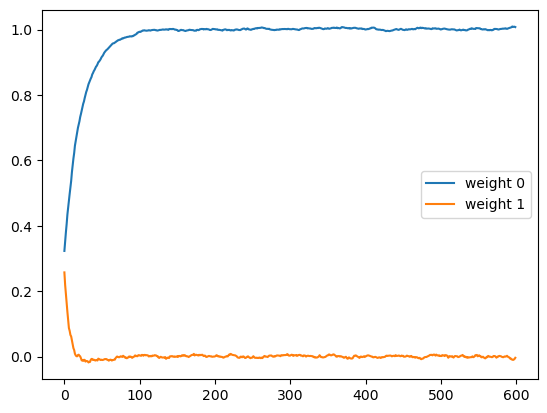

In [58]:
#Batch learning


weights=np.array([.3,.3])
Tcost,Tw0,Tw1=[],[],[]
batch_size=50
nb_batch=int(training_set_size/batch_size)
nb_epoch=200
learning_rate=.03*2

for j in range(nb_epoch):
    for k in range(nb_batch):
        
        Id=np.random.randint(0,training_set_size,batch_size) #Selecting randomly batch_size elemnts from training set 
        y=transfert_batch(x_train[Id],weights) #Forward propagation
        Tcost.append(cost(y,labels_train[Id]).mean())
        Dw=dcostdweight_batch(x_train[Id],y,labels_train[Id]) 
        weights-=learning_rate*np.average(Dw,axis=1) #Averaging the weight update
        Tw0.append(weights[0])
        Tw1.append(weights[1])
        
plt.figure()
plt.plot(Tcost,label='cost')
plt.legend()

plt.figure()
plt.plot(Tw0,label='weight 0')
plt.plot(Tw1,label='weight 1')
plt.legend()


It has the advantage of smoothing out the variation of the cost functions and the weights.

array([0., 0.])